# TikTok EDA 

In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### EXPLORATORY DATA ANALYSIS ON TIKTOK DATASET

In [45]:
df = pd.read_csv(r"D:\Desktop\Project Data Analyst\Python\Top 1000 Tiktokers all over the world\top_1000_tiktokers.csv")
df.head()

,Rank,Username,Tiktok Link,Name,Subscribers Count,Views. Avg,Likes. Avg,Comments. Avg,Shares. Avg
0,1,badbunny,https://www.tiktok.com/@badbunny,Bad Bunny,23.4M,63.1M,10.3M,65.2K,108.6K
1,2,noahschnapp,https://www.tiktok.com/@noahschnapp,Noah Schnapp,26.1M,23.4M,4.8M,46.7K,22.1K
2,3,khaby.lame,https://www.tiktok.com/@khaby.lame,Khabane lame,145.9M,47.5M,2.5M,46K,9.4K
3,4,coopernoriega,https://www.tiktok.com/@coopernoriega,Cooper Noriega,3.2M,31M,1.3M,120.9K,8.4K
4,5,avrillavigne,https://www.tiktok.com/@avrillavigne,Avril Lavigne,4M,24.7M,3.5M,32.1K,22.7K


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rank               1000 non-null   int64 
 1   Username           1000 non-null   object
 2   Tiktok Link        1000 non-null   object
 3   Name               998 non-null    object
 4   Subscribers Count  1000 non-null   object
 5   Views. Avg         1000 non-null   object
 6   Likes. Avg         1000 non-null   object
 7   Comments. Avg      1000 non-null   object
 8   Shares. Avg        1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


In [47]:
df.shape

(1000, 9)

In [48]:
df.describe()

,Rank
count,1000.000000
mean,500.500000
std,288.819436
min,1.000000
25%,250.750000
50%,500.500000
75%,750.250000
max,1000.000000


In [49]:
df.columns

Index(['Rank', 'Username', 'Tiktok Link', 'Name', 'Subscribers Count',
       'Views. Avg', 'Likes. Avg', 'Comments. Avg', 'Shares. Avg'],
      dtype='object')

In [50]:
df.isnull().sum()

Rank                 0
Username             0
Tiktok Link          0
Name                 2
Subscribers Count    0
Views. Avg           0
Likes. Avg           0
Comments. Avg        0
Shares. Avg          0
dtype: int64

In [51]:
df.dropna(axis = 0 , inplace = True)
df.isnull().sum()

Rank                 0
Username             0
Tiktok Link          0
Name                 0
Subscribers Count    0
Views. Avg           0
Likes. Avg           0
Comments. Avg        0
Shares. Avg          0
dtype: int64

In [52]:
def figure_size():
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(10)
    font = {'family' : 'normal','size'   : 13}

#### ANALYZE OF SUBSCRIBER COUNT

In [53]:
subscriber_count = df.groupby('Subscribers Count').size().reset_index().sort_values(by = 0,ascending = 0).rename(columns = {0:'counts'})
subscriber_count

,Subscribers Count,counts
8,1.9M,23
111,2.1M,22
6,1.7M,17
5,1.6M,16
113,2.3M,16
...,...,...
211,36.5K,1
210,36.2M,1
209,354.5K,1
208,35.8M,1


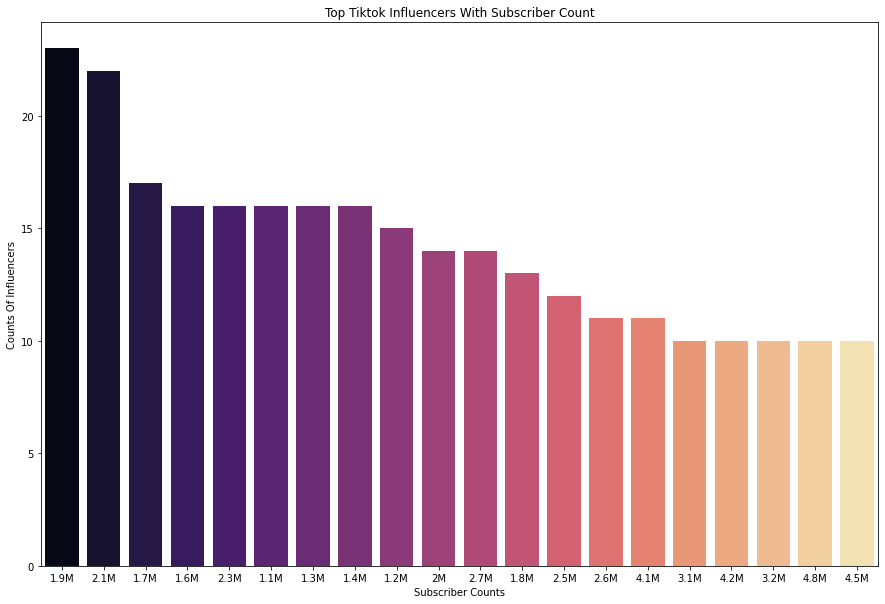

In [54]:
figure_size()
sns.barplot(y = subscriber_count.counts[:20],x = subscriber_count['Subscribers Count'][:20],palette = 'magma')
plt.ylabel('Counts Of Influencers')
plt.xlabel('Subscriber Counts')
plt.title('Top Tiktok Influencers With Subscriber Count')
plt.show()

In [55]:
fig = px.pie(subscriber_count, values=subscriber_count.counts[:20], names=subscriber_count['Subscribers Count'][:20], title='Subscriber Count of Tiktokers')
fig.show();

In [56]:
ax2= px.treemap(df,path=['Subscribers Count'],title="Subscriber Counts",)
ax2.show()

#### ANALYZE OF LIKES

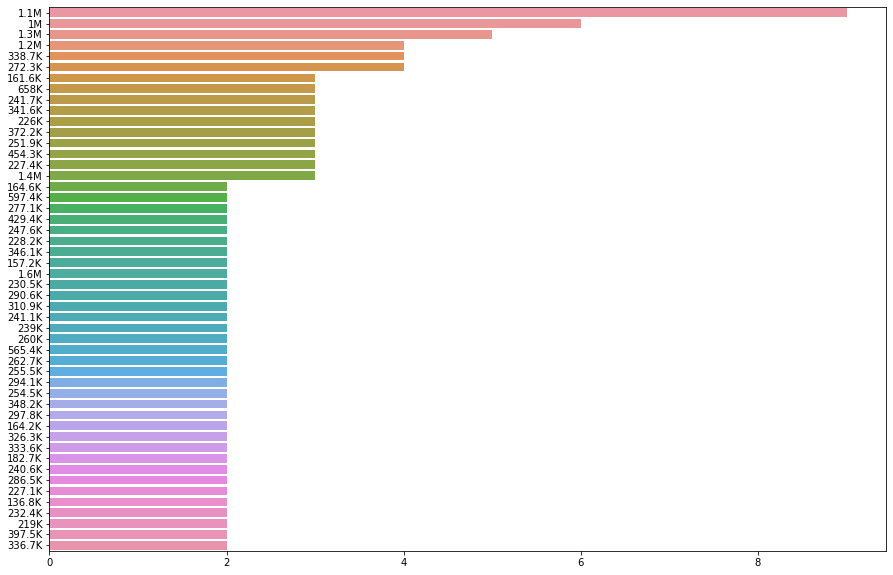

In [57]:
likes = df['Likes. Avg'].value_counts()
figure_size()
sns.barplot(x = likes.values[:50],y = likes.index[:50]);

In [58]:
ax2= px.treemap(df,path=['Likes. Avg'],title="Likes Counts",)
ax2.show();

In [59]:
def remove(txt):
    if 'K' in txt:
        txt = txt.replace('K','')
        txt = float(txt) * 1000
        return str(txt)
    elif 'M' in txt:
        txt = txt.replace('M','')
        txt = float(txt) * 1000000
        return str(txt)

In [60]:
df['Likes. Avg'] = df['Likes. Avg'].apply(remove)
df['Subscribers Count'] = df['Subscribers Count'].apply(remove)
df['Views. Avg'] = df['Views. Avg'].apply(remove)
df['Comments. Avg'] = df['Comments. Avg'].apply(remove)
df['Shares. Avg'] = df['Shares. Avg'].apply(remove)

In [61]:
df['Likes. Avg'] = df['Likes. Avg'].astype('float32')
df['Subscribers Count'] = df['Subscribers Count'].astype('float32')
df['Views. Avg'] = df['Views. Avg'].astype('float32')
df['Comments. Avg'] = df['Comments. Avg'].astype('float32')
df['Shares. Avg'] = df['Shares. Avg'].astype('float32')

In [62]:
df.columns

Index(['Rank', 'Username', 'Tiktok Link', 'Name', 'Subscribers Count',
       'Views. Avg', 'Likes. Avg', 'Comments. Avg', 'Shares. Avg'],
      dtype='object')

#### ANALYZE OF VIEWS

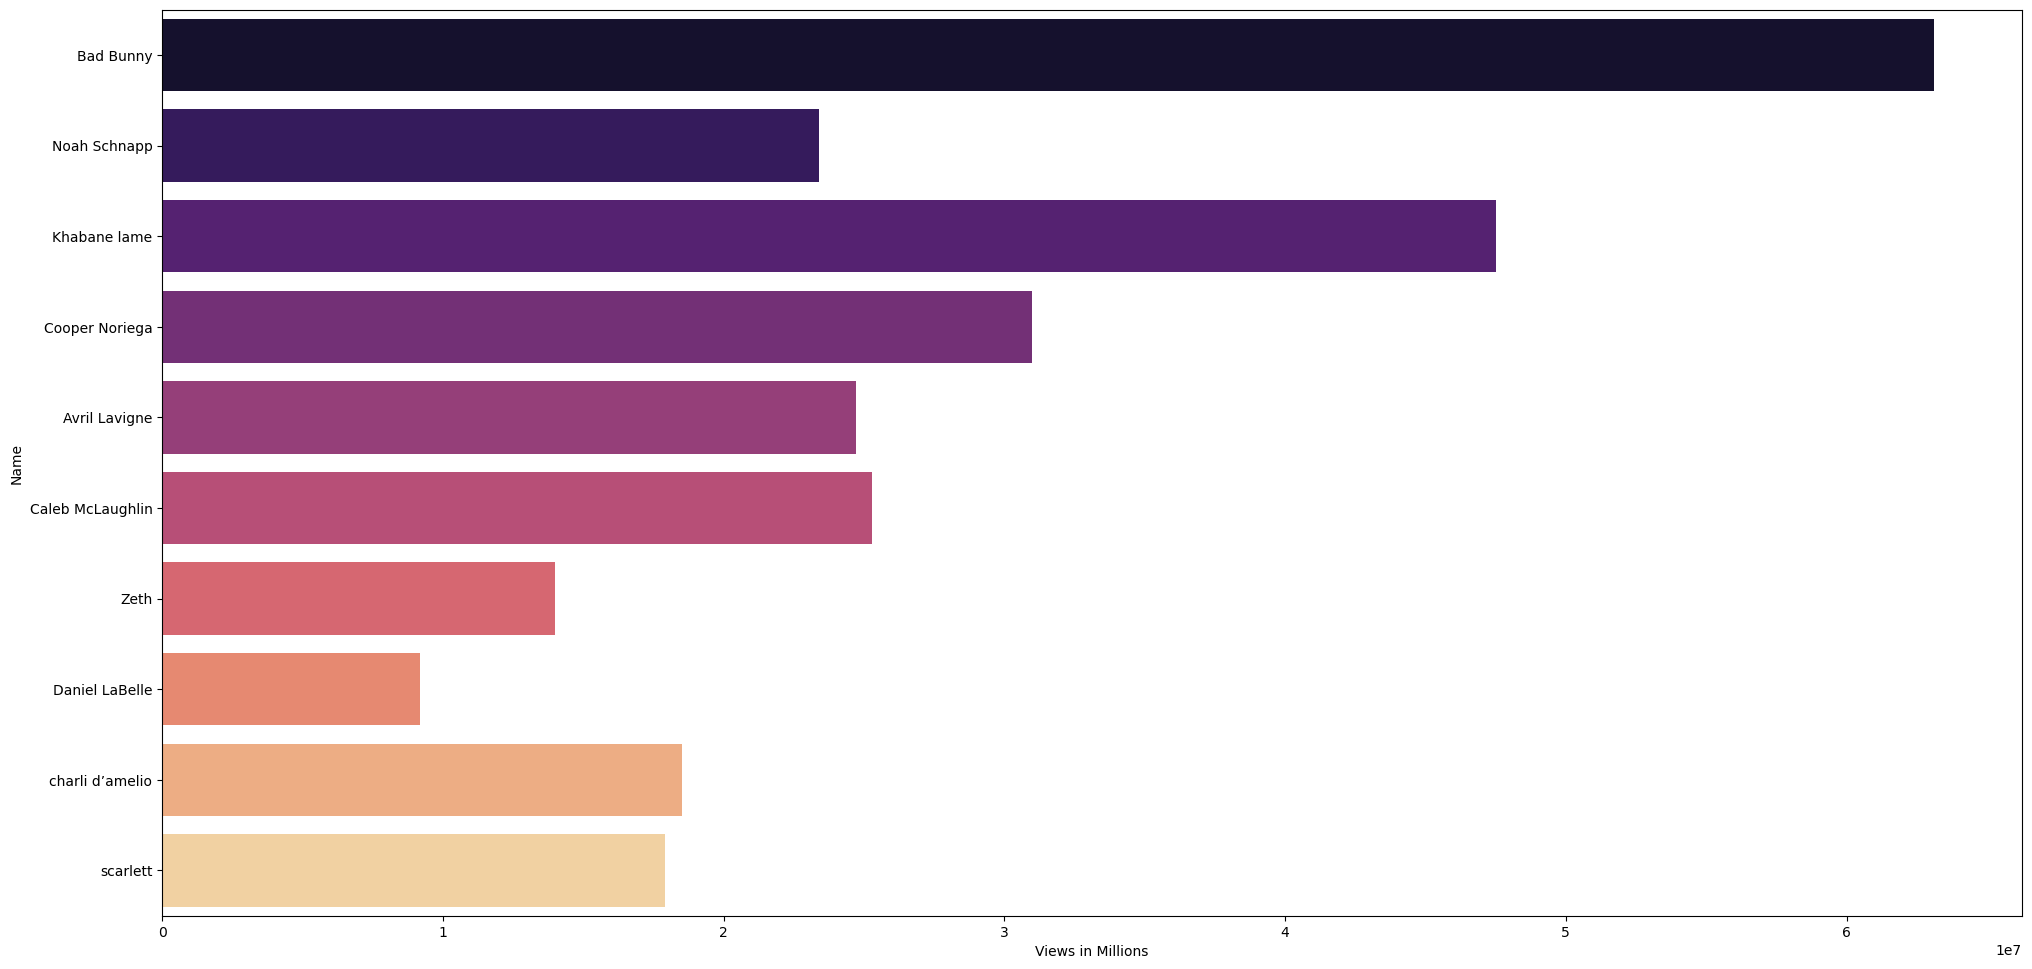

In [63]:
plt.figure(figsize=(24, 12), dpi=100)
sns.barplot(y=df["Name"][:10],x=df['Views. Avg'][:10],palette = 'magma')
plt.xlabel('Views in Millions')
plt.show();

#### ANALYZE OF COMMENTS

In [64]:
comments = df.sort_values(by = 'Comments. Avg',ascending = False)

In [65]:
comments.head()

,Rank,Username,Tiktok Link,Name,Subscribers Count,Views. Avg,Likes. Avg,Comments. Avg,Shares. Avg
3,4,coopernoriega,https://www.tiktok.com/@coopernoriega,Cooper Noriega,3200000.0,31000000.0,1300000.0,120900.0,8400.0
0,1,badbunny,https://www.tiktok.com/@badbunny,Bad Bunny,23400000.0,63100000.0,10300000.0,65200.0,108600.0
9,10,scarlettsspam2,https://www.tiktok.com/@scarlettsspam2,scarlett,2100000.0,17900000.0,845800.0,53900.0,6300.0
16,17,kwo.owk,https://www.tiktok.com/@kwo.owk,KWOOWK,1900000.0,7700000.0,730600.0,48200.0,1400.0
1,2,noahschnapp,https://www.tiktok.com/@noahschnapp,Noah Schnapp,26100000.0,23400000.0,4800000.0,46700.0,22100.0


C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 129354 missing from current font.

C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 129354 missing from current font.



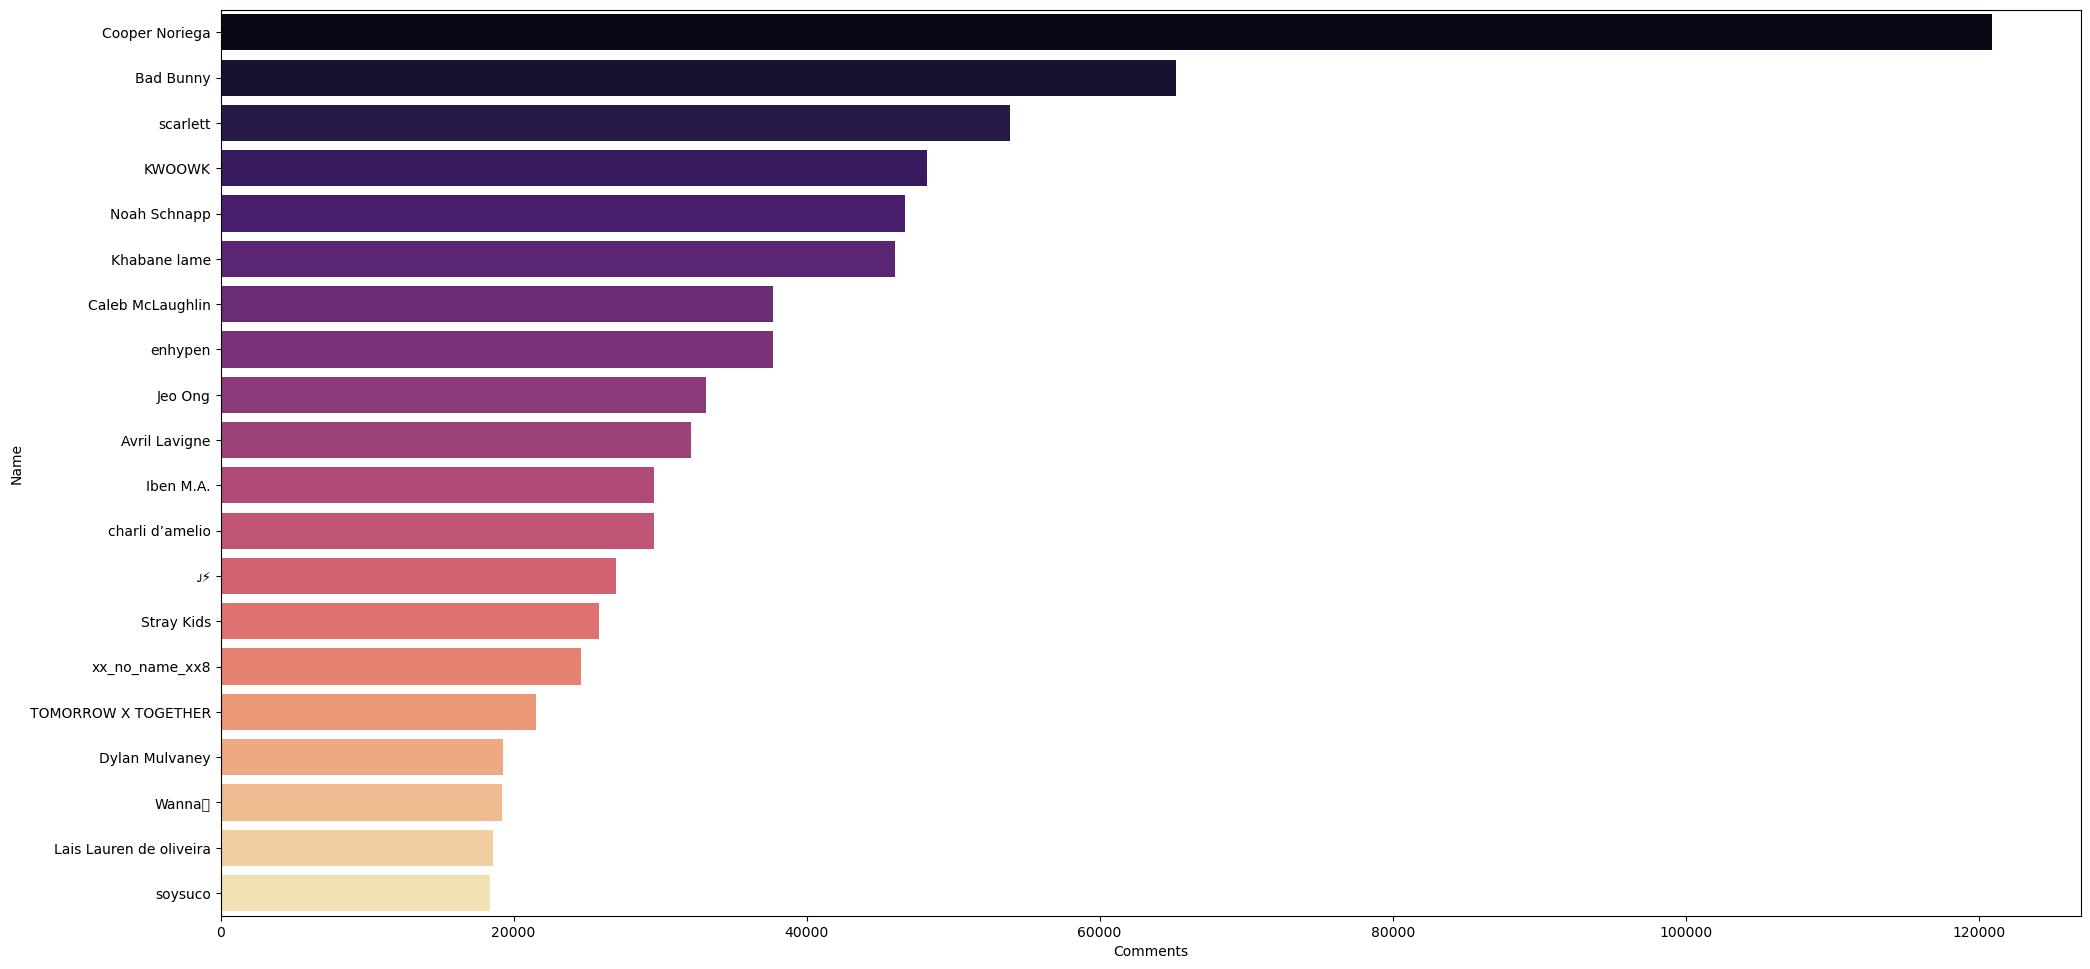

In [66]:
plt.figure(figsize=(24, 12), dpi=100)
sns.barplot(y="Name",x='Comments. Avg',data = comments[:20],palette = 'magma')
plt.xlabel('Comments')
plt.show();